In [1]:
import numpy as np
import cv2
import pandas as pd

from matplotlib import pyplot as plt

In [7]:
def smear(xmin,ymin,xmax,ymax,img,type,color):
    if (xmin<2):
        xmin = 2
    if (ymin<2):
        ymin = 2

    tmp = np.ones([(ymax-ymin), 2, 3]) * 0
    img[ymin:ymax, (xmin-2):xmin, 0:3] = tmp
    tmp = np.ones([2,(xmax-xmin),3]) * 0
    img[(ymin-2):ymin, xmin:xmax, 0:3] = tmp
    tmp = np.ones([(ymax-ymin),2,3]) * 0
    img[ymin:ymax, (xmax-2):xmax, 0:3] = tmp
    tmp = np.ones([2,(xmax-xmin),3]) * 0
    img[(ymax-2):ymax, xmin:xmax, 0:3] = tmp

    cv2.putText(img, type, (xmin + 10, ymin + 15),
							cv2.FONT_HERSHEY_SIMPLEX, 1e-3 * img.shape[0], color, 2)
    return 

In [8]:
#specify the csv path containing identifiers
csv_path = '/home/sarayu941/blood_imaging/BCCD_Dataset/test.csv'
#specify name of the input file
blood = "BloodImage_00023.jpg"
#specify root folder for blood images
root = '/home/sarayu941/blood_imaging/BCCD_Dataset/BCCD/JPEGImages/'

In [9]:
img = cv2.imread(root + blood)

In [10]:
df = pd.read_csv(csv_path)
rslt_df = df.loc[df['filename'] == blood]
celltypes = ["RBC", "WBC", "Platelets"]
colors = [(0,0,255),(255,0,0),(0,0,0)]

for i,name in enumerate(celltypes):
    rslt_df1 = rslt_df.loc[rslt_df['cell_type'] == name]

    for ind in rslt_df1.index:
        xmin = int(rslt_df1["xmin"][ind])
        xmax = int(rslt_df1["xmax"][ind])
        ymin = int(rslt_df1["ymin"][ind])
        ymax = int(rslt_df1["ymax"][ind])
        smear(xmin,ymin,xmax,ymax,img,type=name,color=colors[i])

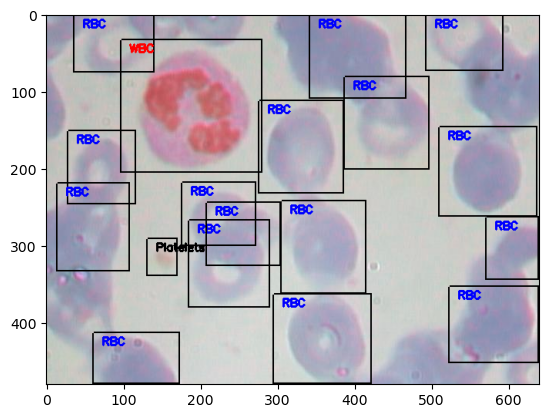

In [11]:
plt.imshow(img)